# `AE3`

autor: Szymon Gut

nr indeksu: 313361

W ramach tej pracy domowej został zaimplementowany algorytm ewolucyjny do trenowania sieci neuronowych. 

Został on przetestowany na trzech zbiorach danych:
- multimodal-large
- iris
- auto-mpg

Wyniki można uznać za zadowalające. Na zbiorach danych auto-mpg oraz iris wyniki były bardzo dobre, jeśli natomiast chodzi o zbiór multimodal-large to MSE również udało się znieść do rozsądnego poziomu, jednak patrząc do jakiego progu udało nam się je znieść przy trenowaniu z uzyciem propagacji wstecznej, nie możemy być zadowoleni z uzyskanego rezultatu.

In [76]:
import numpy as np
import pandas as pd
from mlp import Evolution
from crossovers import *
from mutations import *
from selections import *
from network_package.activation_functions import *
from network_package.metrics import *
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Zbiór danych `Mutlimodal-large-training`

In [83]:
train_df = pd.read_csv('data/multimodal-large-training.csv')
n_train = len(train_df)
x_train_modal = np.reshape(np.array(train_df.x), (n_train, 1))
y_train_modal = np.reshape(np.array(train_df.y), (n_train, 1))

test_df = pd.read_csv('data/multimodal-large-test.csv')
n_test = len(test_df)
x_test_modal = np.reshape(np.array(test_df.x), (n_test, 1))
y_test_modal = np.reshape(np.array(test_df.y), (n_test, 1))

In [38]:
crossover_ratio = 0.8
mutation_ratio = 0.15
crossover = one_point_multi_dim
mutation = mask_mutation
selection_func = elite_selection
population_size = 1000
input_shape_network=x_train_modal.shape
neurons_num=[15,15,1]
activations=[Sigmoid(), Sigmoid(), Linear()]
X = x_train_modal
y = y_train_modal
loss = Mse()



Generation 0 best score is 5253.002246647691
Population average score is 5346.76054290553

Generation 1 best score is 5253.002246647691
Population average score is 5335.588792759372

Generation 2 best score is 5252.6685042615645
Population average score is 5325.962392899821

Generation 3 best score is 5252.6685042615645
Population average score is 5320.761055339629

Generation 4 best score is 5249.525254889651
Population average score is 5315.225213968792

Generation 5 best score is 5249.525254889651
Population average score is 5310.704907925263

Generation 6 best score is 5249.525254889651
Population average score is 5308.878691530939

Generation 7 best score is 5237.365064092573
Population average score is 5303.121121409405

Generation 8 best score is 5233.337716944042
Population average score is 5295.943816626793

Generation 9 best score is 5233.337716944042
Population average score is 5294.429957639938

Generation 10 best score is 5227.097518450382
Population average score is 5295.

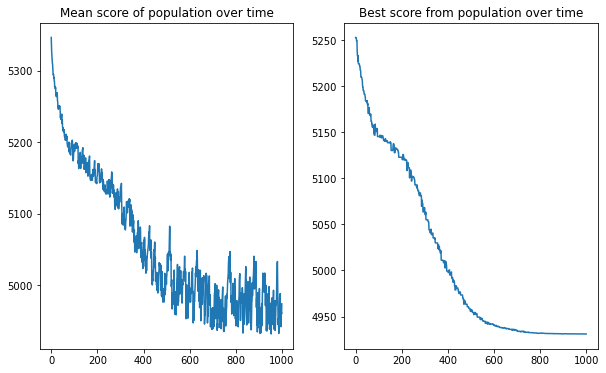

In [39]:
modal_large = Evolution(crossover_ratio, mutation_ratio, crossover, mutation, 
                 selection_func, population_size, input_shape_network, neurons_num,
                 activations, X, y, loss)

modal_large.fit(iterations=1000)
modal_large.visualise()

In [32]:
crossover_ratio = 0.7
mutation_ratio = 0.2
crossover = random_layer
mutation = noise_mutation
selection_func = elite_selection
population_size = 100
input_shape_network=x_train_modal.shape
neurons_num=[10,10,10,1]
activations=[Sigmoid(), Sigmoid(), Sigmoid(), Linear()]
X = x_train_modal
y = y_train_modal
loss = Mse()



Generation 0 best score is 5264.47986915156
Population average score is 5352.403310274311

Generation 1 best score is 5247.18397019887
Population average score is 5340.808273527406

Generation 2 best score is 5247.18397019887
Population average score is 5337.2337901714645

Generation 3 best score is 5247.18397019887
Population average score is 5322.840609858325

Generation 4 best score is 5230.036121588227
Population average score is 5313.5151634823005

Generation 5 best score is 5230.036121588227
Population average score is 5308.682141498487

Generation 6 best score is 5226.195593938666
Population average score is 5303.894267865684

Generation 7 best score is 5226.195593938666
Population average score is 5296.747066281325

Generation 8 best score is 5222.700781884066
Population average score is 5292.061709350924

Generation 9 best score is 5195.498363250746
Population average score is 5285.064176605529

Generation 10 best score is 5190.073945185807
Population average score is 5280.287

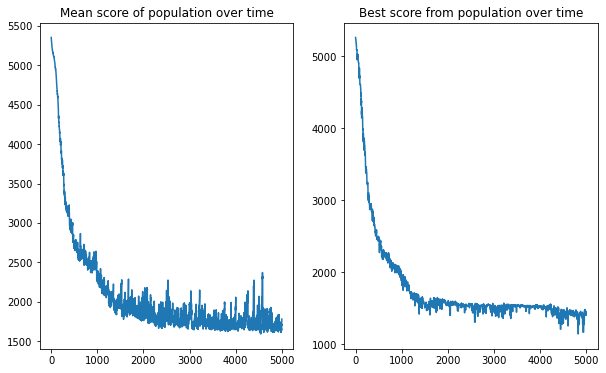

In [33]:
modal_large2 = Evolution(crossover_ratio, mutation_ratio, crossover, mutation,
                 selection_func, population_size, input_shape_network, neurons_num,
                 activations, X, y, loss)

modal_large2.fit(iterations=5000)
modal_large2.visualise()

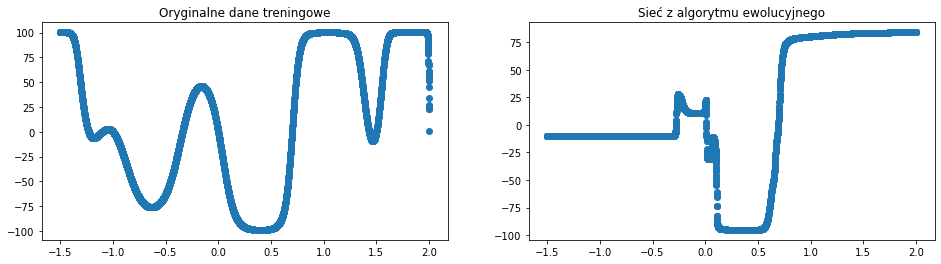

In [115]:
plt.figure(figsize=[16, 4])
plt.subplot(121)
plt.scatter(x_train_modal, y_train_modal)
plt.title('Oryginalne dane treningowe')
plt.subplot(122)
plt.scatter(x_train_modal, modal_large2.best_individual.propagate_forward(x_train_modal))
plt.title('Sieć z algorytmu ewolucyjnego')
plt.show()

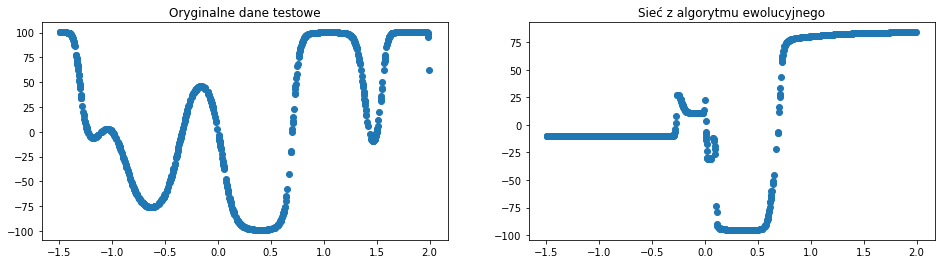

In [114]:
plt.figure(figsize=[16, 4])
plt.subplot(121)
plt.scatter(x_test_modal, y_test_modal)
plt.title('Oryginalne dane testowe')
plt.subplot(122)
plt.scatter(x_test_modal, modal_large2.best_individual.propagate_forward(x_test_modal))
plt.title('Sieć z algorytmu ewolucyjnego')
plt.show()

In [85]:
mse_test = Mse().calculate(modal_large2.best_individual.propagate_forward(x_test_modal), y_test_modal)
mse_train = Mse().calculate(modal_large2.best_individual.propagate_forward(x_train_modal), y_train_modal)

In [107]:
mse_test


1599.5295710819248

In [108]:
mse_train

1452.3916838547802

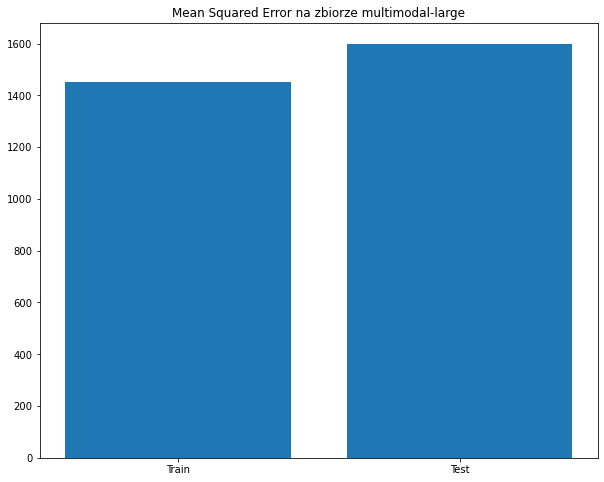

In [90]:
plt.figure(figsize=(10, 8))
plt.bar(['Train', 'Test'], [mse_train, mse_test])

plt.title('Mean Squared Error na zbiorze multimodal-large')

plt.show()

# Zbiór danych `Iris`

In [60]:
iris = datasets.load_iris()
x_iris = iris.data
y_iris = iris.target
y_iris = np.reshape(y_iris, (150, 1))
oh = OneHotEncoder()
y_iris = oh.fit_transform(y_iris).toarray()

In [61]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=42)

In [77]:
crossover_ratio = 0.7
mutation_ratio = 0.2
crossover = random_layer
mutation = noise_mutation
selection_func = elite_selection
population_size = 200
input_shape_network=x_iris.shape
neurons_num=[10,10,3]
activations=[Tanh(), Tanh(), Softmax()]
X = X_iris_train
y = y_iris_train
loss = Cross_entropy()



Generation 0 best score is 0.42120137169373106
Population average score is 0.8720022917520481

Generation 1 best score is 0.47234533694599545
Population average score is 0.8780787494714457

Generation 2 best score is 0.3560133776721601
Population average score is 0.8084782348181815

Generation 3 best score is 0.3936148908895996
Population average score is 0.8293892514111902

Generation 4 best score is 0.4903151016015241
Population average score is 0.86938773588571

Generation 5 best score is 0.4649426811886784
Population average score is 0.8101815452687475

Generation 6 best score is 0.44593087820604543
Population average score is 0.8259364321224494

Generation 7 best score is 0.3504796853909281
Population average score is 0.8544646494046079

Generation 8 best score is 0.44597137421905053
Population average score is 0.8755507614700726

Generation 9 best score is 0.35568647502591105
Population average score is 0.7910829990768435

Generation 10 best score is 0.35568647502591105
Populatio

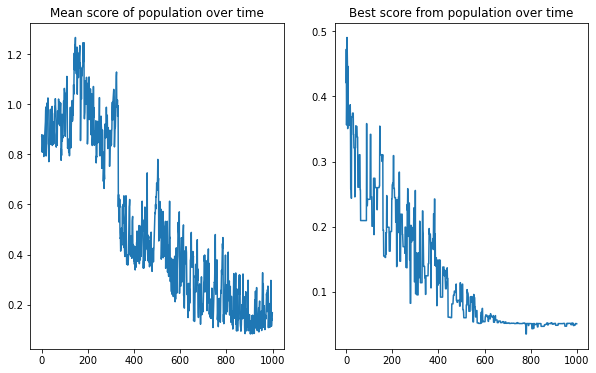

In [78]:
model_iris = Evolution(crossover_ratio, mutation_ratio, crossover, mutation,
                 selection_func, population_size, input_shape_network, neurons_num,
                 activations, X, y, loss)

model_iris.fit(iterations=1000)
model_iris.visualise()

In [98]:
f1_score_iris_train = F_score().calculate(model_iris.best_individual.propagate_forward(X_iris_train), y_iris_train)
accuracy_iris_train = metrics.accuracy_score(np.argmax(model_iris.best_individual.propagate_forward(X_iris_train), axis=1),
                                np.argmax(y_iris_train, axis=1))
confusion_matrix_iris_train = metrics.confusion_matrix(np.argmax(model_iris.best_individual.propagate_forward(X_iris_train), axis=1), 
                                            np.argmax(y_iris_train, axis=1))

f1_score_iris_test = F_score().calculate(model_iris.best_individual.propagate_forward(X_iris_test), y_iris_test)
accuracy_iris_test = metrics.accuracy_score(np.argmax(model_iris.best_individual.propagate_forward(X_iris_test), axis=1),
                                np.argmax(y_iris_test, axis=1))
confusion_matrix_iris_test = metrics.confusion_matrix(np.argmax(model_iris.best_individual.propagate_forward(X_iris_test), axis=1), 
                                            np.argmax(y_iris_test, axis=1))

In [104]:
confusion_matrix_iris_train

array([[40,  0,  0],
       [ 0, 38,  0],
       [ 0,  3, 39]], dtype=int64)

In [109]:
f1_score_iris_train

0.975

In [110]:
f1_score_iris_test

1.0

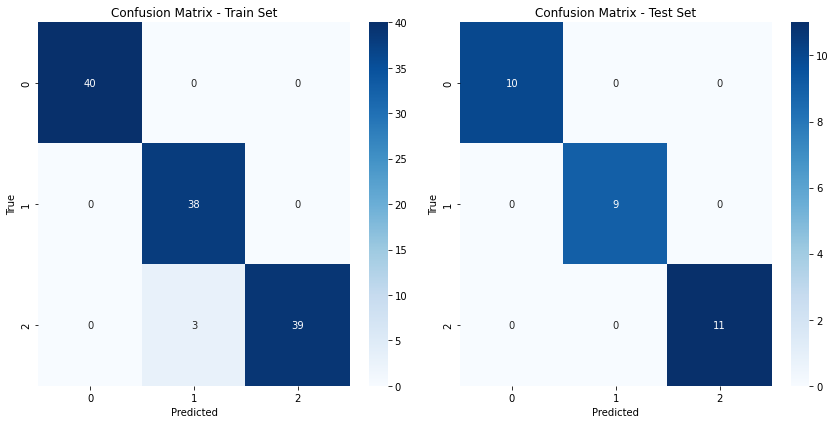

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_matrix_iris_train, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix - Train Set')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

sns.heatmap(confusion_matrix_iris_test, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix - Test Set')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

# Zbiór danych `auto-mpg`

In [32]:
df_mpg = pd.read_csv('data/auto-mpg.data', header=None, delim_whitespace=True)

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']
df_mpg.columns = column_names

In [33]:
df_mpg.replace("?", np.nan, inplace=True)

df_mpg = df_mpg.dropna()

In [34]:
y_mpg = df_mpg.mpg
y_mpg = np.reshape(np.array(y_mpg), (392, 1))

In [35]:
x_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
X_mpg = df_mpg[x_columns]
X_mpg = X_mpg.values

In [36]:
X_mpg_train, X_mpg_test, y_mpg_train, y_mpg_test = train_test_split(X_mpg, y_mpg, test_size=0.2, random_state=42)

In [39]:
X_mpg_train[:, 2] = X_mpg_train[:, 2].astype(float)

X_mpg_test[:, 2] = X_mpg_test[:, 2].astype(float)

In [50]:
X_mpg_train

array([[6, 225.0, 110.0, ..., 18.7, 78, 1],
       [4, 140.0, 92.0, ..., 14.9, 76, 1],
       [6, 171.0, 97.0, ..., 14.5, 75, 1],
       ...,
       [4, 151.0, 85.0, ..., 17.6, 78, 1],
       [4, 98.0, 65.0, ..., 20.7, 81, 1],
       [8, 400.0, 150.0, ..., 14.0, 73, 1]], dtype=object)

In [69]:
crossover_ratio = 0.7
mutation_ratio = 0.2
crossover = random_layer
mutation = noise_mutation
selection_func = elite_selection
population_size = 100
input_shape_network=X_mpg_train.shape
neurons_num=[10,10,10,1]
activations=[Sigmoid(), Sigmoid(), Sigmoid(), Linear()]
X = X_mpg_train
y = y_mpg_train
loss = Mse()



In [68]:
X_mpg_train = X_mpg_train.astype(float)
X_mpg_test = X_mpg_test.astype(float)

Generation 0 best score is 492.03188821031745
Population average score is 606.7330401487193

Generation 1 best score is 479.6318161080256
Population average score is 600.5444699862029

Generation 2 best score is 468.51446486123376
Population average score is 587.0008197807736

Generation 3 best score is 435.4452998016157
Population average score is 565.9682625915345

Generation 4 best score is 390.785553729395
Population average score is 552.8138739435765

Generation 5 best score is 417.70547907489595
Population average score is 546.7629242810473

Generation 6 best score is 392.9379713410696
Population average score is 538.752755720141

Generation 7 best score is 392.51028903509484
Population average score is 524.6957540293309

Generation 8 best score is 312.54249102977326
Population average score is 490.6643925134765

Generation 9 best score is 312.54249102977326
Population average score is 477.67570980762275

Generation 10 best score is 312.54249102977326
Population average score is 

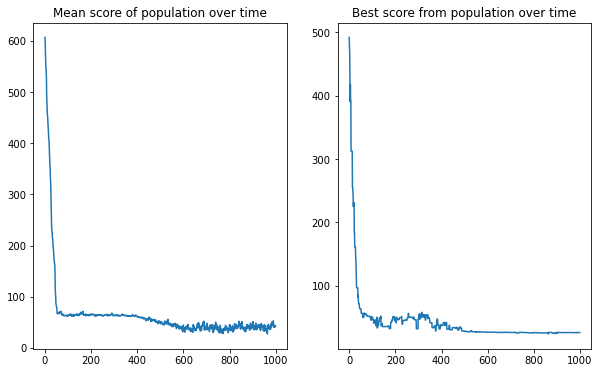

In [71]:
mpg = Evolution(crossover_ratio, mutation_ratio, crossover, mutation, 
                 selection_func, population_size, input_shape_network, neurons_num,
                 activations, X, y, loss)

mpg.fit(iterations=1000)
mpg.visualise()

In [72]:
mse_test_mpg = Mse().calculate(mpg.best_individual.propagate_forward(X_mpg_test), y_mpg_test)
mse_train_mpg = Mse().calculate(mpg.best_individual.propagate_forward(X_mpg_train), y_mpg_train)

c:\Users\sguci\Desktop\EvolutionalAlghorithms\network_package\activation_functions.py:55: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [73]:
mse_test_mpg

25.130550839603664

In [74]:
mse_train_mpg

25.743342841564157

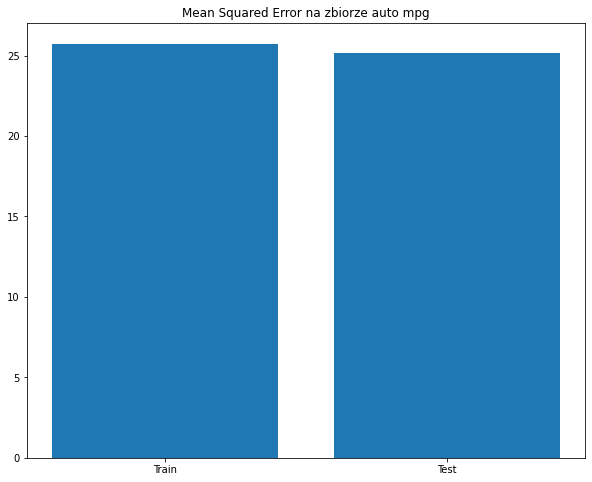

In [75]:
plt.figure(figsize=(10, 8))
plt.bar(['Train', 'Test'], [mse_train_mpg, mse_test_mpg])

plt.title('Mean Squared Error na zbiorze auto mpg')

plt.show()